In [1]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

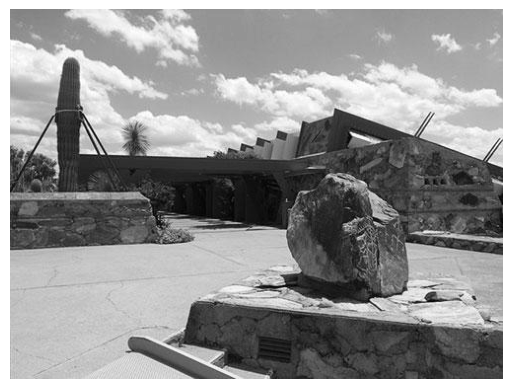

In [4]:
img_orig = plt.imread(IMG_DIR / "panorama3.jpg")
img = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [5]:
num_rows, num_cols = img.shape[0], img.shape[1]
directions = {
    "left": np.array([0, -1]),
    "right": np.array([0, 1]),
    "up": np.array([-1, 0]),
    "down": np.array([1, 0]),
    "up_left": np.array([-1, -1]),
    "up_right": np.array([-1, 1]),
    "down_left": np.array([1, -1]),
    "down_right": np.array([1, 1]),
}

In [12]:
corner_img = np.zeros(img.shape)

for i in range(2, num_rows - 2):
    for j in range(2, num_cols - 2):
        min_ssd = -1
        for d in directions.values():
            u, v = d[0], d[1]
            p1 = img[i - 1 : i + 2, j - 1 : j + 2]
            p2 = img[i + u - 1 : i + u + 2, j + v - 1 : j + v + 2]
            ssd = np.sum((p1 - p2) ** 2)  # type: ignore
            if min_ssd == -1:
                min_ssd = ssd
            elif ssd < min_ssd:
                min_ssd = ssd
        corner_img[i, j] = min_ssd

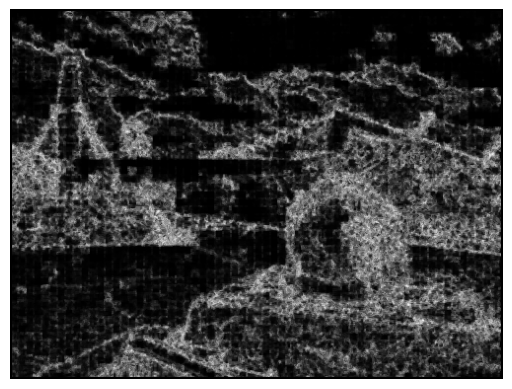

In [11]:
plt.imshow(corner_img, cmap="gray")
plt.axis("off")
plt.show()

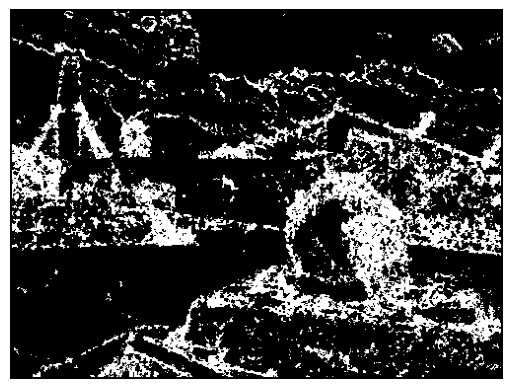

In [46]:
threshold = corner_img.mean() + corner_img.std()
corner_img_thresh = corner_img > threshold
plt.imshow(corner_img_thresh, cmap="gray")
plt.axis("off")
plt.show()

In [39]:
img = img.astype(np.float32)
mask_x = np.array([[-1], [1]])
Ix = cv2.filter2D(img, -1, mask_x)
Iy = cv2.filter2D(img, -1, mask_x.T)
Ix2, Iy2, IxIy = Ix**2, Iy**2, Ix * Iy  # type: ignore
window = np.ones((3, 3))
sIx2 = cv2.filter2D(Ix2, -1, window)
sIy2 = cv2.filter2D(Iy2, -1, window)
sIxIy = cv2.filter2D(IxIy, -1, window)

L1 = ((sIx2 + sIy2) + ((sIx2 + sIy2) ** 2 - 4 * (sIxIy**2)) ** 0.5) / 2  # type: ignore
L2 = ((sIx2 + sIy2) - ((sIx2 + sIy2) ** 2 - 4 * (sIxIy**2)) ** 0.5) / 2  # type: ignore

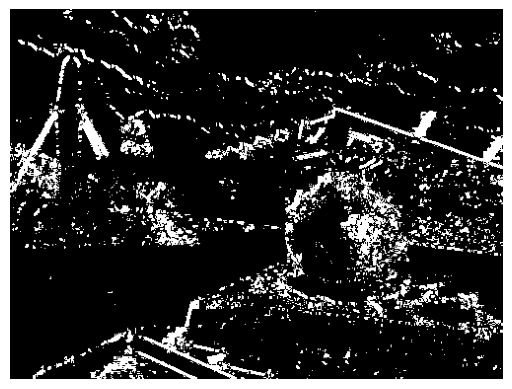

In [57]:
threshold = L2.mean() + 0.01 * L2.std()
L2_thresh = L2 > threshold
plt.imshow(L2_thresh, cmap="gray")
plt.axis("off")
plt.show()